## some quick plots_v2


In [28]:
import pandas as pd
import numpy as np
from datetime import time ,datetime,timedelta
from matplotlib.ticker import FuncFormatter, ScalarFormatter  # stuff to ptu the tick in the ylabel in thousand of dollars
from scipy import stats
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# #dates = pd.read_csv('List_break_up_dates.csv', names=['date_time'], header=None)
# dates['date_time'] = pd.to_datetime(dates['date_time'])
# dates.set_index('date_time',inplace=True)

# dates['Year'] = dates.index.year
# dates['minute'] = dates.index.minute
# dates.info()

# betting=pd.read_csv('Overview.csv')
# betting['Year'] = pd.to_datetime(betting['Year'], format='%Y').dt.year
# betting['Jackpot'] = pd.to_numeric(betting['Jackpot'], errors='coerce') # coercing ' No data availabel``
# betting['No. Winners'] = pd.to_numeric(betting['No. Winners'], errors='coerce') 
# betting['winnings per ticket'] = pd.to_numeric(betting['winnings per ticket'], errors='coerce') 
# # merging and aligning the data
# data = pd.merge(dates.reset_index(), betting, how='left', on='Year')

# data.set_index('date_time', inplace=True)

# data['HourOfDay'] = data.index.hour + data.index.minute / 60
# data['Day'] = data.index.day_of_year
# data['Hour'] = data.index.hour

# print(data.head())


In [29]:

# fig, ax1 = plt.subplots(figsize=(20,5))
# ax1.plot(data.index.year, data['Jackpot'] / 1000, color='tab:blue',alpha=0.4)
# ax1.scatter(data.index.year, data['Jackpot'] / 1000, color='tab:blue')
# ax1.set_xlabel('Years')
# ax1.set_ylabel('Price pool')


# #fancy-axis
# ax1.yaxis.set_major_formatter(ScalarFormatter())
# ax1.get_yaxis().set_major_formatter(ScalarFormatter())
# ax1.set_yticklabels([f"${int(x)}k" for x in ax1.get_yticks()])
# ax1.set_title('Price pool over the Years')

# plt.figure(figsize=(20,5))
# plt.plot(data.index.year, data['No. Winners'], color='tab:green',alpha=0.4)
# plt.scatter(data.index.year, data['No. Winners'], color='tab:green')
# plt.ylabel('Number of Winners')
# plt.title('Number of Winners over the Years')
# plt.tight_layout()
# plt.show()


# fig, ax1 = plt.subplots(figsize=(20,5))        
# ax1.plot(data.index.year, data['winnings per ticket'] / 1000, color='tab:red',alpha=0.4)
# ax1.scatter(data.index.year, data['winnings per ticket']/ 1000, color='tab:red')
# mean=data['winnings per ticket'].mean()/1000
# ax1.axhline(mean, color='black', linestyle='--',label=f'mean winnings={mean:.2f}k')
# ax1.set_xlabel('Years')
# ax1.set_ylabel('winnings per ticket')

# #fancy-axis
# ax1.yaxis.set_major_formatter(ScalarFormatter())
# ax1.get_yaxis().set_major_formatter(ScalarFormatter())
# ax1.set_yticklabels([f"${int(x)}k" for x in ax1.get_yticks()])
# ax1.set_title('Winnings per ticket over the Years')
# ax1.legend()



In [30]:
# fig, ax1 = plt.subplots(figsize=(20,5))   
# ax1.scatter(data.index.dayofyear, data['No. Winners'], color='blue', alpha=0.6)
# ax1.set_xlabel('Day of the Year')
# ax1.set_ylabel('Number of Winners')
# ax1.set_title('Number of Winners over Days of the Year')
# for day, winners, year in zip(data.index.dayofyear, data['No. Winners'], data.index.year):
#     ax1.annotate(str(year), (day, winners), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8,rotation=30)

# ax2 = ax1.twinx()

# ax2.hist(data.index.dayofyear, bins=max(data.index.dayofyear)-min(data.index.dayofyear), color='tab:green', alpha=0.4)
# ax2.set_ylabel('n. of occurrences,  not accumulated)', color='tab:green')


# day_of_year_mean = data.groupby(data.index.dayofyear)['No. Winners'].mean()
# day_of_year_std=data.groupby(data.index.dayofyear)['No. Winners'].std()

# fig, ax = plt.subplots(figsize=(20, 5))
# ax.plot(day_of_year_mean.index, day_of_year_mean, marker='o', color='blue', alpha=0.1)
# ax.scatter(day_of_year_mean.index, day_of_year_mean, marker='o', color='blue', alpha=0.6)
# ax.set_xlabel('Day of the Year')
# ax.set_ylabel('Mean number of Winners')
# ax.set_title('Winners for Each Day of the Year')
# ax2=ax.twinx()
# ax2.plot(day_of_year_std.index, day_of_year_std, marker='o', color='red', alpha=0.1)
# ax2.scatter(day_of_year_std.index, day_of_year_std, marker='o', color='red', alpha=0.6)
# ax2.set_ylabel('Standard Deviation of number of Winners')
# plt.grid(True)
# plt.show()



summing the total number of winners per date/hour might not be completely representative, maybe the mean+std or other way to interpret when there a multiples occurrences of multiple winners in the same day/hour.


In [31]:
# fig, ax1 = plt.subplots(figsize=(20,5))   
# ax1.scatter(data['HourOfDay'], data['No. Winners'], color='blue', alpha=0.4)
# ax1.set_xlabel('Hour of the Day')
# ax1.set_ylabel('Number of Winners')
# ax1.set_title('Number of Winners over Hours of the Day')
# for day, winners, year in zip(data['HourOfDay'], data['No. Winners'], data.index.year):
#     ax1.annotate(str(year), (day, winners), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8,rotation=30)

# ax2 = ax1.twinx()
# ax2.hist(data['HourOfDay'], bins=24, color='tab:green', alpha=0.7)
# ax2.set_ylabel('n. of occurrences,  not accumulated)', color='blue')

# hour_of_day_sum = data.groupby(data.index.hour)['No. Winners'].sum()

# fig, ax = plt.subplots(figsize=(20, 5))
# ax.plot(hour_of_day_sum.index, hour_of_day_sum, marker='o', color='blue', alpha=0.8,label='hour')


# hour_minute_of_day_sum = data.groupby(data['HourOfDay'])['No. Winners'].sum()

# ax.plot(hour_minute_of_day_sum.index, hour_minute_of_day_sum, marker='o', color='red', alpha=0.5,label='hour-minute')
# ax.set_xlabel('hour of the day')
# ax.set_ylabel('Total Number of Winners')
# ax.set_title('Sum of Winners for Each hour-minute of the day')
# plt.legend()
# plt.grid(True)
# plt.show()





In [32]:
# plt.figure(figsize=(10,6))
# plt.scatter(data.index.dayofyear, data['HourOfDay'], c=data['No. Winners'], cmap='viridis')
# plt.colorbar(label='Number of Winners')
# plt.xlabel('Day of the Year')
# plt.ylabel('Hour of the Day(decimal)')
# plt.title('Number of Winners over Days of the Year and Hour-minute of the Day')





lets interpolate the data first for weeks_of_year,hour,  then days_of_years,hour( otherwise the domain is too big for the values in z ( most of the elements will be zero, ))


In other words, we could use the mean number of winners per day of year and hour_minute, but as th scatter plot shows most of the interpolated points will be zero, instead we could aggregate by week_of_year, and reduce the the x-domain by 7, use hour_of_day instead of hour_minute, reducing y-domain by 60. This might not be enought we coudl use the total number of winners instead of the mean, but ** i think this is pushing it a little bit**, anyways this is just changin `.mean` to `.sum`

In [33]:

# data['WeekOfYear'] = data.index.isocalendar().week


# #Week of Year and Hour of Day
# agg_week_hour = data.groupby(['WeekOfYear', 'Hour'])['No. Winners'].mean().reset_index()

# # Interpolate for a smoother surface
# grid_x, grid_y = np.meshgrid(
#     np.linspace(agg_week_hour['WeekOfYear'].min(), agg_week_hour['WeekOfYear'].max(), 52),
#     np.linspace(agg_week_hour['Hour'].min(), agg_week_hour['Hour'].max(), 24)
# )
# grid_z = griddata(
#     (agg_week_hour['WeekOfYear'], agg_week_hour['Hour']),
#     agg_week_hour['No. Winners'],
#     (grid_x, grid_y),
#     method='linear'
# )

# plt.figure(figsize=(12, 6))
# contour = plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='viridis')
# plt.colorbar(contour, label='(mean) Number of Winners')
# plt.xlabel('Week of the Year')
# plt.ylabel('Hour of the Day')
# plt.title('MeanNumber of Winners by Week and Hour')
# plt.tight_layout()
# plt.show()


# plt.show()




In [34]:
# agg_day_hour_minute = data.groupby(['Day', 'HourOfDay'])['No. Winners'].mean().reset_index()  # 

# # Interpolate for a smoother surface
# grid_x, grid_y = np.meshgrid(
#     np.linspace(agg_day_hour_minute['Day'].min(), agg_day_hour_minute['Day'].max(),int(agg_day_hour_minute['Day'].max()-agg_day_hour_minute['Day'].min())),
#     np.linspace(agg_day_hour_minute['HourOfDay'].min(), agg_day_hour_minute['HourOfDay'].max(),int(agg_day_hour_minute['HourOfDay'].max()-agg_day_hour_minute['HourOfDay'].min()))
# )
# grid_z = griddata(
#     (agg_day_hour_minute['Day'], agg_day_hour_minute['HourOfDay']),
#     agg_day_hour_minute['No. Winners'],
#     (grid_x, grid_y),
#     method='linear'
# )

# plt.figure(figsize=(12, 6))
# contour = plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='viridis')
# plt.colorbar(contour, label='(mean) Number of Winners')
# plt.xlabel('day of the Year')
# plt.ylabel('deciaml hour')
# plt.title('Mean Number of Winners by day and Hour-minute')
# plt.tight_layout()
# plt.show()


# plt.show()

## 2017 & 2018; All bets 

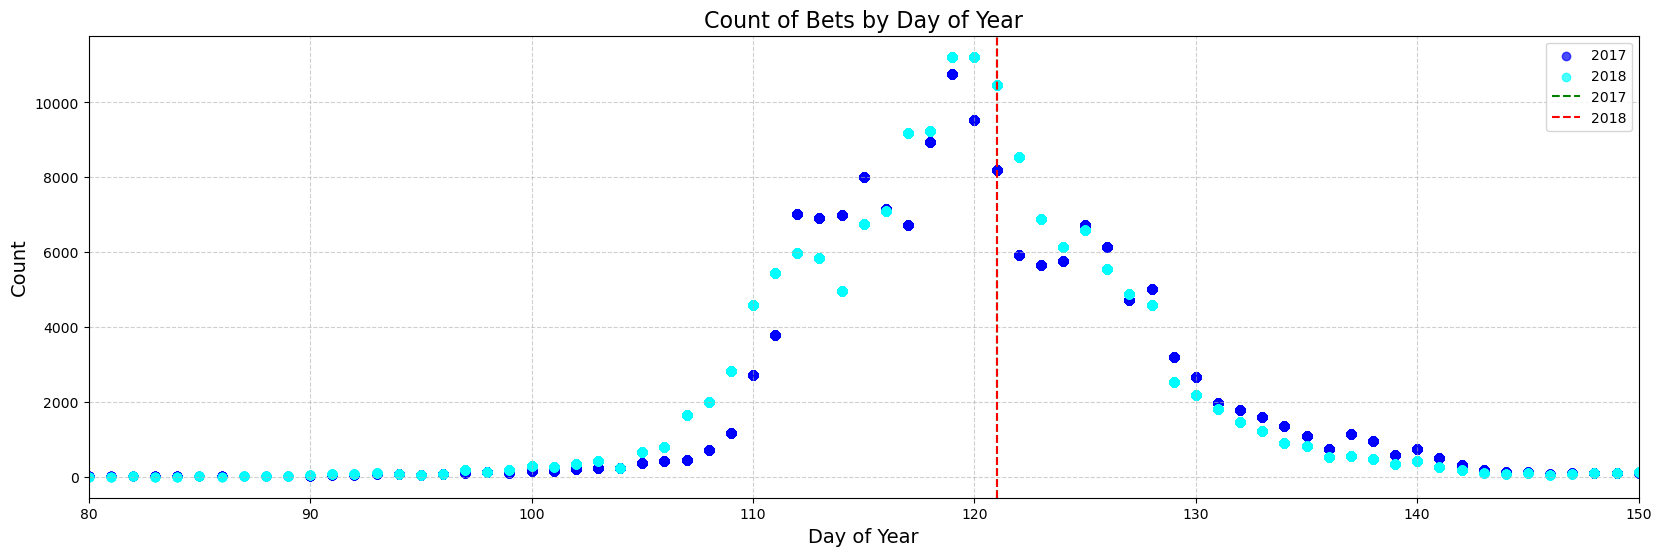

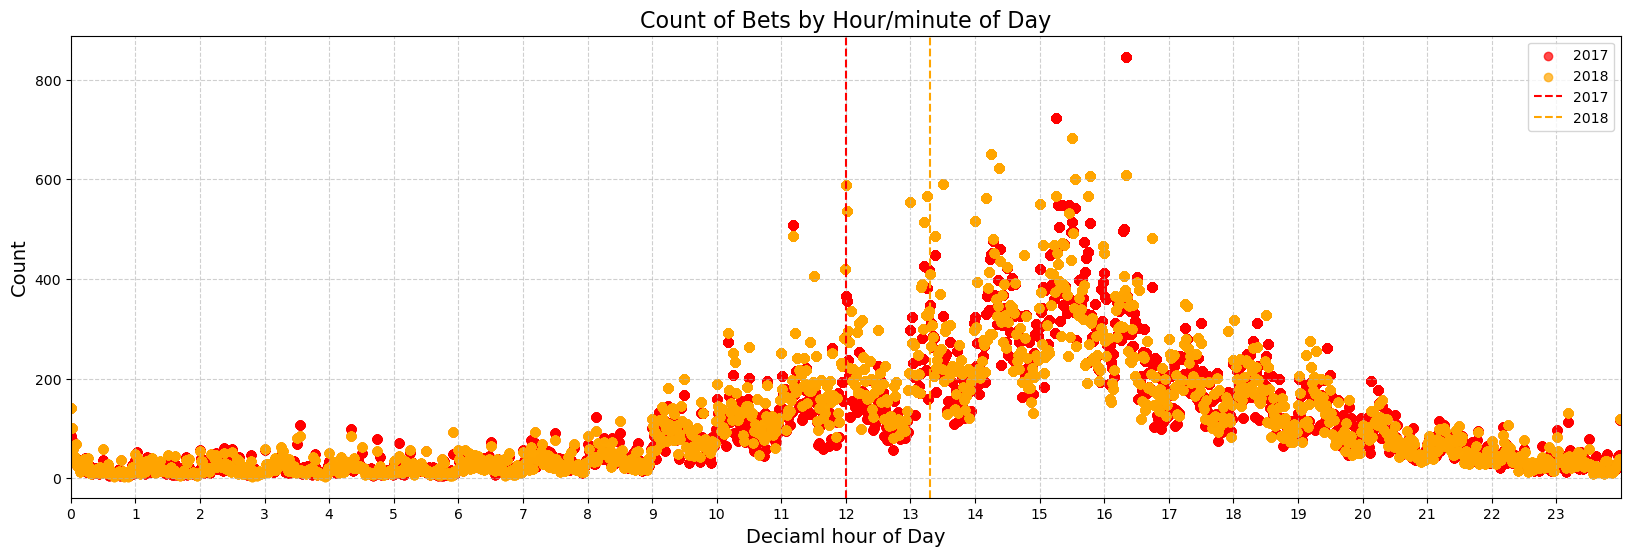

(array([7.61842354e-05, 5.04685281e-05, 4.18191521e-05, 4.44587889e-05,
        5.73747478e-05, 6.96764515e-05, 4.22341893e-05, 4.69822153e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.52318666e-04, 1.63740491e-04, 1.82334159e-04, 1.96395621e-04,
        1.01949747e-04, 1.09453620e-04, 3.44563915e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.41992540e-04, 0.00000000e+00,
        3.05766234e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.73950407e-04, 3.72371410e-04]),
 array([1.00000000e+00, 3.74966667e+02, 7.48933333e+02, 1.12290000e+03,
        1.49686667e+03, 1.87083333e+03, 2.24480000e+03, 2.61876667e+03,
        2.99273333e+03, 3.36670000e+03, 3.74066667e+03, 4.11463333e+03,
        4.48860000e+03, 4.86256667e+03, 5.23653333e+03, 5.61050000e+03,
        5.98446667e+03, 6.35843333e+03, 6.73240000e+03, 7.10636667e+03,
        7.48033333e+03, 7.85430000e+03, 8.22826667e+03, 8.60223333e+03,
        8.97620000e+03

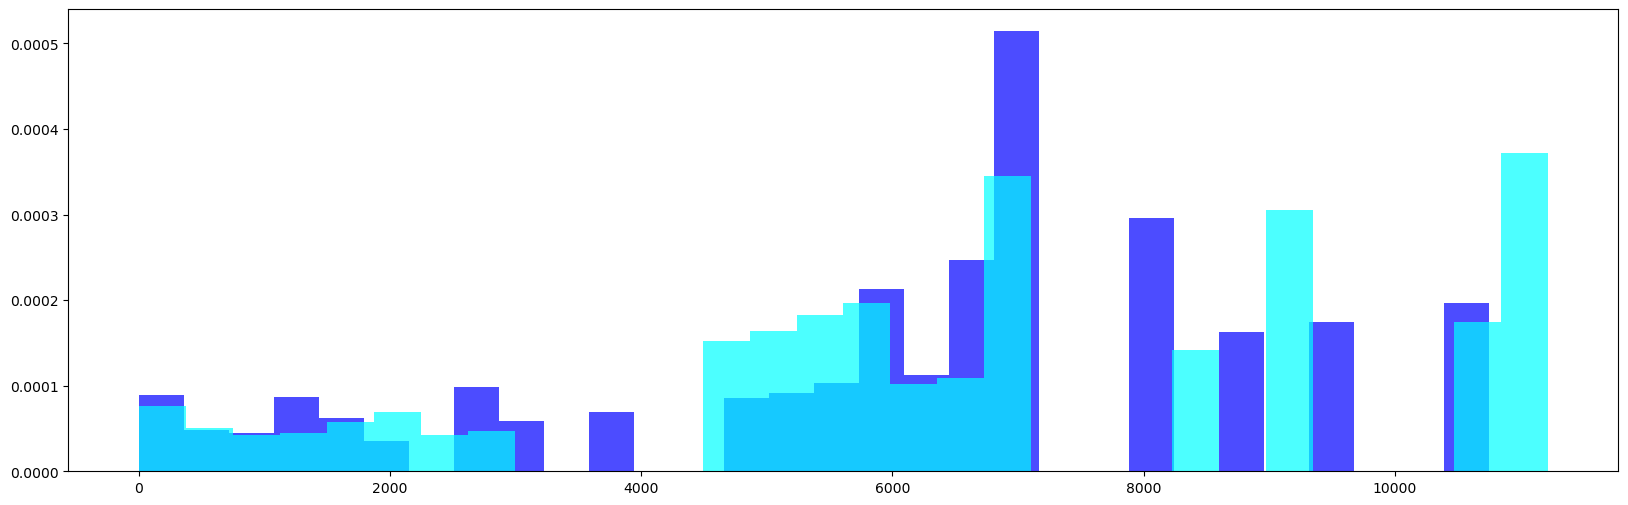

In [35]:


bets_2017=pd.read_csv('parsed_df_v2.csv',index_col=0)
bets_2018=pd.read_csv('parsed_df.csv',index_col=0)
# bets_2017.info()
breakup_date_2018 = pd.to_datetime('2018-05-01 13:18')
breakup_day_2018 = breakup_date_2018.dayofyear
breakup_hour_2018 = breakup_date_2018.hour
breakup_hour_decimal_2018 = breakup_date_2018.hour + breakup_date_2018.minute / 60

break_up_date_2017 = pd.to_datetime('5/1/2017  12:00:00 PM')
breakup_day_2017 = break_up_date_2017.dayofyear
breakup_hour_2017 = break_up_date_2017.hour
breakup_hour_decimal_2017 = break_up_date_2017.hour + break_up_date_2017.minute / 60


bets_2017.index=pd.to_datetime(bets_2017.index)
bets_2018.index=pd.to_datetime(bets_2018.index)

bets_2017['DayOfYear'] = bets_2017.index.dayofyear
bets_2018['DayOfYear'] = bets_2018.index.dayofyear

bets_2017['Hour'] = bets_2017.index.hour
bets_2018['Hour'] = bets_2018.index.hour
bets_2017['minute'] = bets_2017.index.minute
bets_2018['minute'] = bets_2018.index.minute
bets_2017['Hour_decimal'] = bets_2017.index.hour + bets_2017.index.minute / 60
bets_2018['Hour_decimal'] = bets_2018.index.hour + bets_2018.index.minute / 60

bets_2017['Same_Day'] = bets_2017.groupby('DayOfYear')['DayOfYear'].transform('size')
bets_2018['Same_Day'] = bets_2018.groupby('DayOfYear')['DayOfYear'].transform('size')

# bets_2017['Same_hour'] = bets_2017.groupby('Hour')['Hour'].transform('size')
# bets_2018['Same_hour'] = bets_2018.groupby('Hour')['Hour'].transform('size')

# bets_2017['Same_minute'] = bets_2017.groupby('minute')['minute'].transform('size')


bets_2017['Same_decimal_hour'] = bets_2017.groupby('Hour_decimal')['Hour_decimal'].transform('size')
bets_2018['Same_decimal_hour'] = bets_2018.groupby('Hour_decimal')['Hour_decimal'].transform('size')    

plt.figure(figsize=(20, 6))
plt.scatter(bets_2017['DayOfYear'], bets_2017['Same_Day'], color='blue', alpha=0.7,label='2017')
plt.scatter(bets_2018['DayOfYear'], bets_2018['Same_Day'], color='cyan', alpha=0.7,label='2018')

plt.title('Count of Bets by Day of Year', fontsize=16)
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(breakup_day_2017,label='2017',color='green',linestyle='--')
plt.axvline(breakup_day_2018,label='2018',color='red',linestyle='--')
plt.xlim([80,150])
plt.legend()
plt.show()


plt.figure(figsize=(20, 6))
plt.scatter(bets_2017['Hour_decimal'], bets_2017['Same_decimal_hour'], color='red', alpha=0.7, label='2017')
plt.scatter(bets_2018['Hour_decimal'], bets_2018['Same_decimal_hour'], color='orange', alpha=0.7, label='2018')
plt.title('Count of Bets by Hour/minute of Day', fontsize=16)
plt.xlabel('Deciaml hour of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(breakup_hour_decimal_2017,color='red',linestyle='--')
plt.axvline(breakup_hour_decimal_2018,color='orange',linestyle='--')
plt.legend()
plt.xlim([0,24])
plt.xticks(np.arange(0, 24, 1))
plt.show()



The distribution of minute of the hour in breakup event seem reasonably uniform, but the bets seem to favour value close to zero, eg. why would 12:58 be chosen so much less than 13:05 ??? Maybe Benford law , or some Psych effect, there might be and edge here
> review this later 

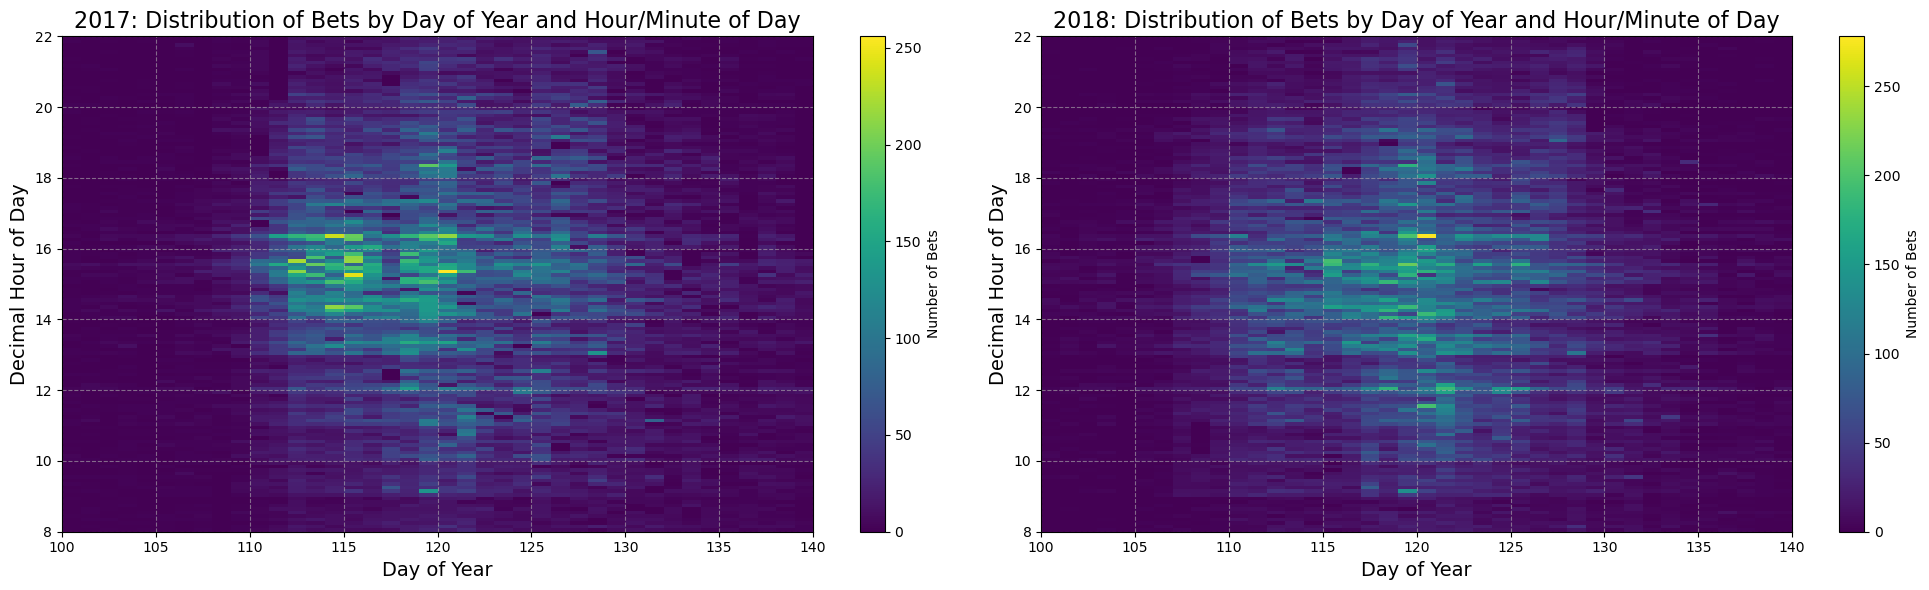

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# First subplot for 2017
heatmap_data_4, xedges_4, yedges_4 = np.histogram2d(bets_2017['DayOfYear'], bets_2017['Hour_decimal'], bins=(np.arange(1, 366), np.arange(0, 24, 0.1)))
im1 = ax1.imshow(heatmap_data_4.T, aspect='auto', cmap='viridis', origin='lower', extent=[xedges_4[0], xedges_4[-1], yedges_4[0], yedges_4[-1]])
ax1.set_title('2017: Distribution of Bets by Day of Year and Hour/Minute of Day', fontsize=16)
ax1.set_xlabel('Day of Year', fontsize=14)
ax1.set_ylabel('Decimal Hour of Day', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xlim([100, 140])
ax1.set_ylim([8, 22])

# Second subplot for 2018
heatmap_data_4, xedges_4, yedges_4 = np.histogram2d(bets_2018['DayOfYear'], bets_2018['Hour_decimal'], bins=(np.arange(1, 366), np.arange(0, 24, 0.1)))
im2 = ax2.imshow(heatmap_data_4.T, aspect='auto', cmap='viridis', origin='lower', extent=[xedges_4[0], xedges_4[-1], yedges_4[0], yedges_4[-1]])
ax2.set_title('2018: Distribution of Bets by Day of Year and Hour/Minute of Day', fontsize=16)
ax2.set_xlabel('Day of Year', fontsize=14)
ax2.set_ylabel('Decimal Hour of Day', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_xlim([100, 140])
ax2.set_ylim([8, 22])

# Add colorbars
fig.colorbar(im1, ax=ax1, label='Number of Bets')
fig.colorbar(im2, ax=ax2, label='Number of Bets')

plt.tight_layout()
plt.show()


In [37]:
#print(df[df['Name']=='PAGE_BREAK'])

2017: Number of unique persons: 62851
Name
JOSEPH DINKINS           2509
RODOLFO REGACHO           835
RENDY GIBBS               809
IVORY JACKS               369
VINCENT JONES             293
MT MCKINLEY BANK POOL     258
DES DUFFY                 249
O                         240
SCOTT HALAMA              221
ENDY GIBBS                213
Name: count, dtype: int64
2018: Number of unique persons: 61709
Name
JOSEPH DINKINS            2879
THE HOOPER FAMILY POOL    2438
IVORY JACKS                399
VINCENT JONES              372
DESMOND DUFFY              317
SCOTT HALAMA               293
SANDRA BJELLAND            269
VORY JACKS                 230
MT MCKINLEY BANK           190
SITKA POOL                 181
Name: count, dtype: int64


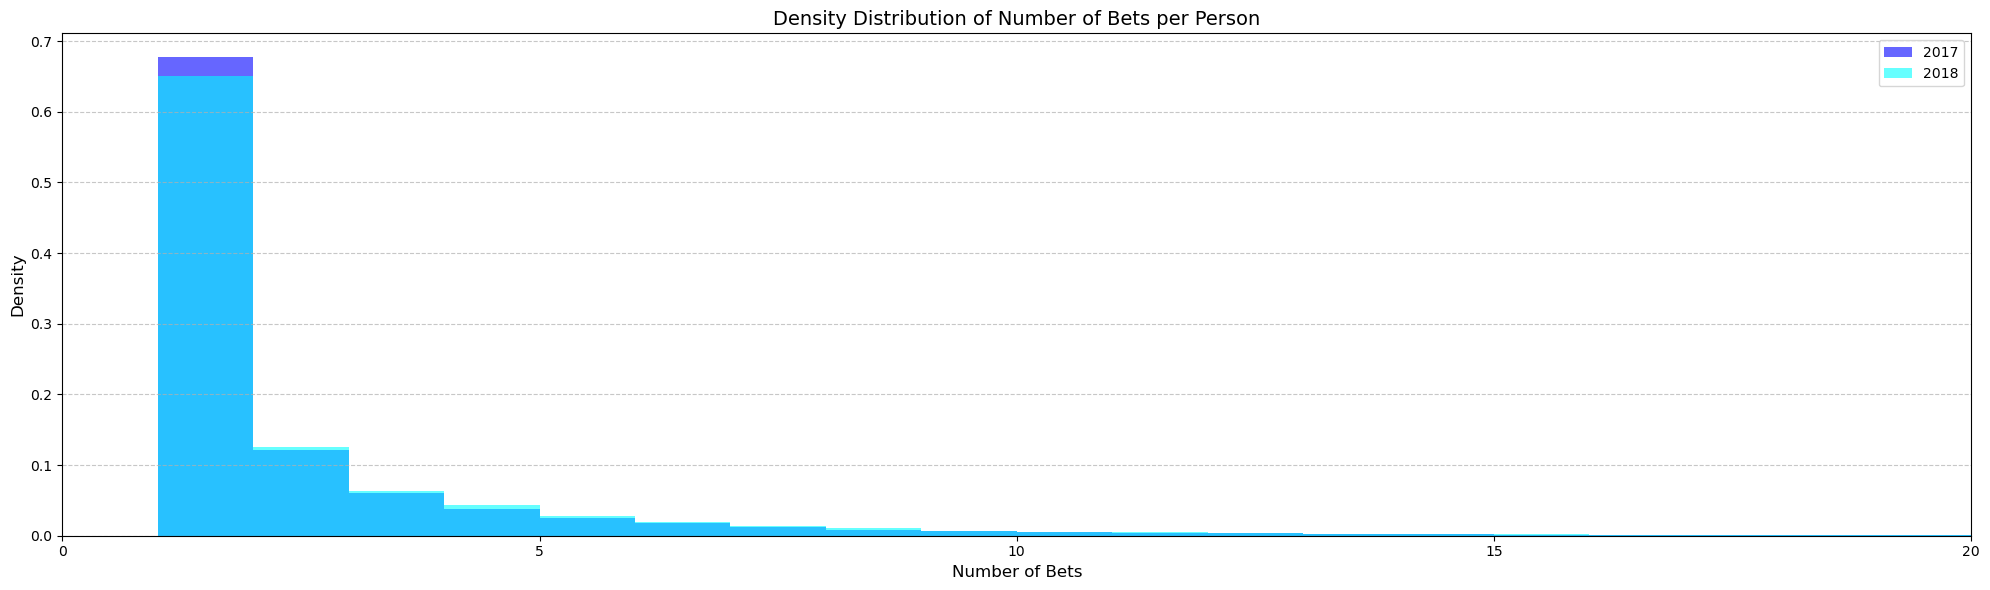

In [38]:

bets_2017_count = bets_2017['Name'].value_counts()
n_unique_2017 = len(bets_2017['Name'].unique())
print(f'2017: Number of unique persons: {n_unique_2017}')
print(bets_2017_count.head(10))


bets_2018_count = bets_2018['Name'].value_counts()
n_unique_2018 = len(bets_2018['Name'].unique())
print(f'2018: Number of unique persons: {n_unique_2018}')
print(bets_2018_count.head(10))




plt.figure(figsize=(20, 6))


plt.hist(bets_2017_count.values, bins=range(0, bets_2017_count.max() + 2), 
         color='blue', alpha=0.6, density=True, label='2017')


plt.hist(bets_2018_count.values, bins=range(0, bets_2018_count.max() + 2), 
         color='cyan', alpha=0.6, density=True, label='2018')

# Adding labels and title
plt.xlabel('Number of Bets', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Density Distribution of Number of Bets per Person', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim([0, 20])
plt.xticks([0, 5, 10, 15, 20])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



Desmond Duffy : DatetimeIndex(['2017-04-01 07:07:00', '2017-04-01 23:11:00',
               '2017-04-10 16:10:00', '2017-04-10 21:48:00',
               '2017-04-11 07:38:00', '2017-04-11 08:37:00',
               '2017-04-11 11:30:00', '2017-04-11 12:27:00',
               '2017-04-11 13:23:00', '2017-04-11 14:38:00',
               ...
               '2017-05-17 16:04:00', '2017-05-17 16:31:00',
               '2017-05-17 17:44:00', '2017-05-18 11:11:00',
               '2017-08-18 23:33:00', '2017-05-19 03:15:00',
               '2017-05-19 12:04:00', '2017-05-19 12:14:00',
               '2017-05-19 12:31:00', '2017-05-21 11:23:00'],
              dtype='datetime64[ns]', name='Datetime', length=240, freq=None)


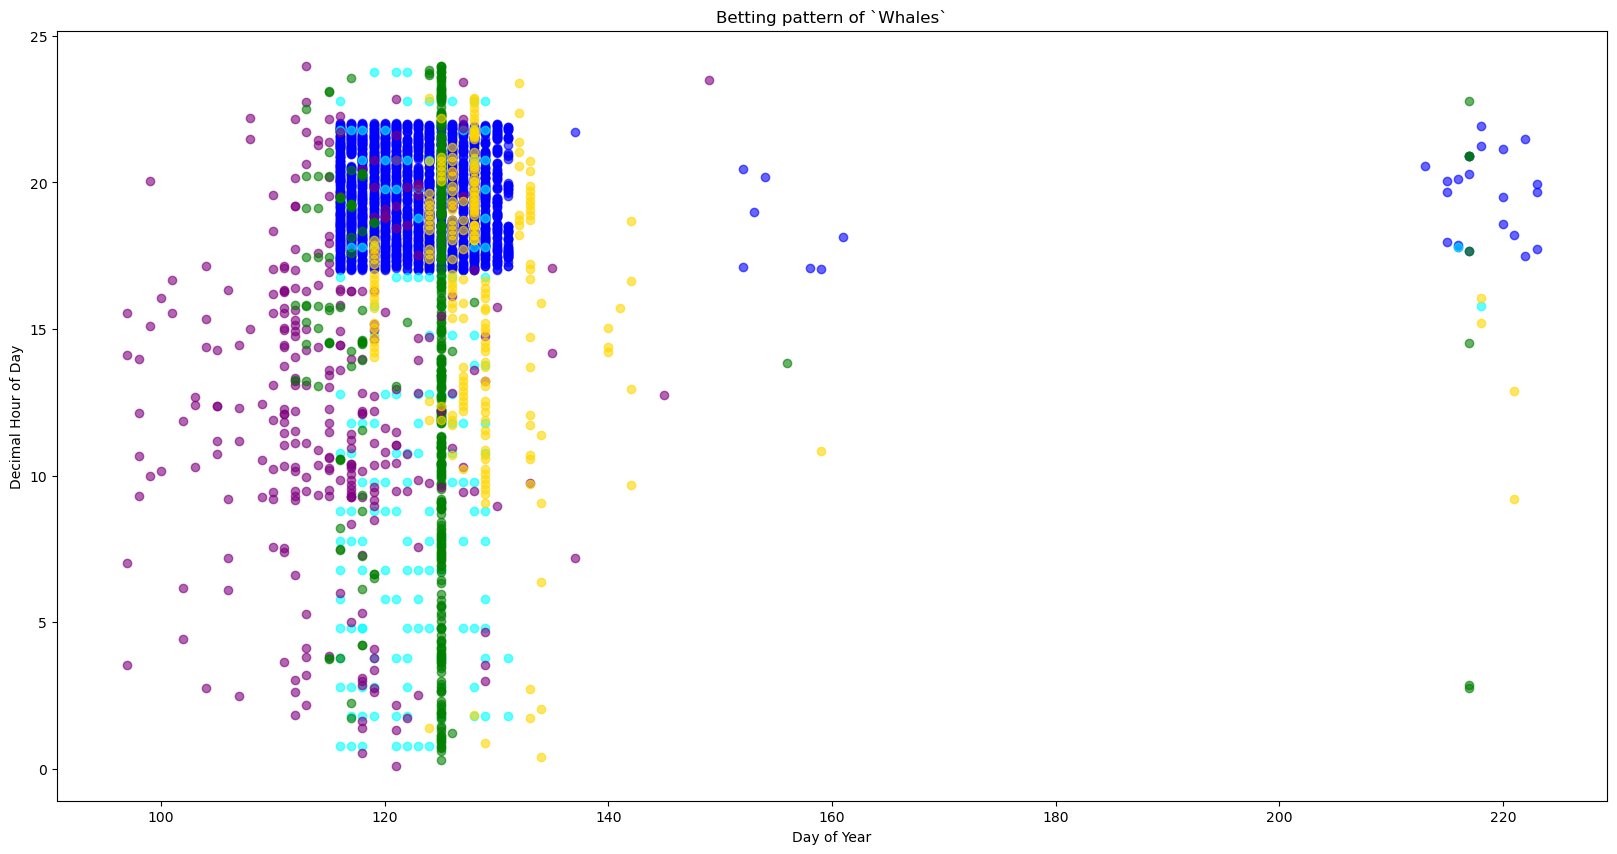

In [39]:
plt.figure(figsize=(20, 10))
plt.title('Betting pattern of `Whales`')
plt.scatter(bets_2017[bets_2017['Name']=='JOSEPH DINKINS']['DayOfYear'],bets_2017[bets_2017['Name']=='JOSEPH DINKINS']['Hour_decimal'],label='JOSEPH DINKINS',color='blue',alpha=0.6)
plt.scatter(bets_2017[bets_2017['Name']=='THE HOOPER FAMILY POOL']['DayOfYear'],bets_2017[bets_2017['Name']=='THE HOOPER FAMILY POOL']['Hour_decimal'],label='THE HOOPER FAMILY POOL',color='red',alpha=0.6)
#plt.scatter(df[df['Name']=='THE HOOPER FAMILY POOL']['DayOfYear'],df[df['Name']=='HE HOOPER FAMILY POOL']['Hour_decimal'],color='red',alpha=0.6)
plt.scatter(bets_2017[bets_2017['Name']=='DESMOND DUFFY']['DayOfYear'],bets_2017[bets_2017['Name']=='DESMOND DUFFY']['Hour_decimal'],color='cyan',alpha=0.6)
plt.scatter(bets_2017[bets_2017['Name']=='IVORY JACKS']['DayOfYear'],bets_2017[bets_2017['Name']=='IVORY JACKS']['Hour_decimal'],color='green',alpha=0.6)
plt.scatter(bets_2017[bets_2017['Name']=='VINCENT JONES']['DayOfYear'],bets_2017[bets_2017['Name']=='VINCENT JONES']['Hour_decimal'],color='purple',alpha=0.6)
plt.scatter(bets_2017[bets_2017['Name']=='SCOTT HALAMA']['DayOfYear'],bets_2017[bets_2017['Name']=='SCOTT HALAMA']['Hour_decimal'],color='gold',alpha=0.6)
plt.scatter(bets_2017[bets_2017['Name']=='SANDRA BJELLAND']['DayOfYear'],bets_2017[bets_2017['Name']=='SANDRA BJELLAND']['Hour_decimal'],color='green',alpha=0.6)
plt.xlabel('Day of Year')
plt.ylabel('Decimal Hour of Day')


print(f"Desmond Duffy : {bets_2017[bets_2017['Name']=='O'].index }")

# plt.figure()
# plt.hist(df[df['Name']=='DESMOND DUFFY']['minute'],color='cyan',label='DESMOND DUFFY',bins=len(df[df['Name']=='DESMOND DUFFY']['minute'].unique()))
# plt.hist(df[df['Name']=='SANDRA BJELLAND']['minute'],color='green',label='SANDRA BJELLAND',bins=len(df[df['Name']=='SANDRA BJELLAND']['minute'].unique())) 
# plt.legend()
# plt.xlabel('minute')
# plt.ylabel('count')
# plt.show()

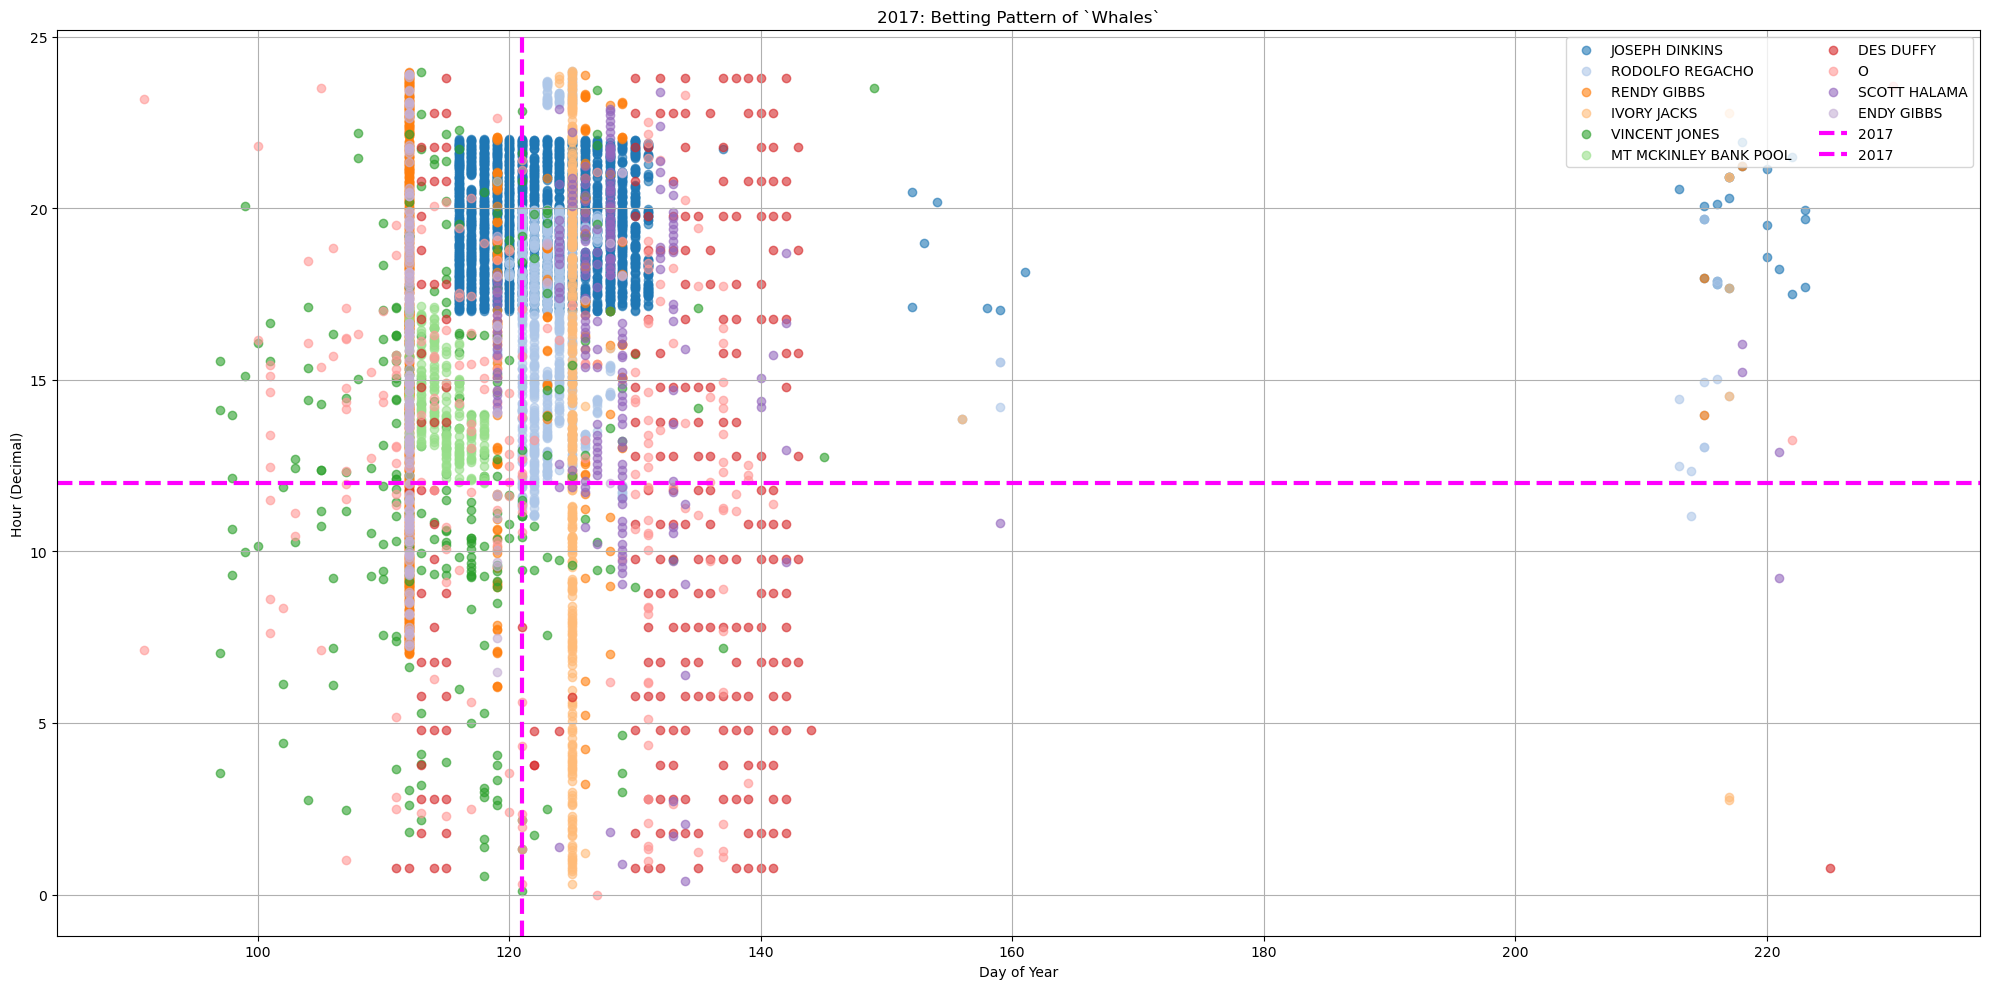

In [40]:
N=10
top_N = bets_2017_count[0:N].index
colors = plt.cm.tab20.colors

plt.figure(figsize=(20, 10))
plt.title('2017: Betting Pattern of `Whales`')

for i, name in enumerate(top_N):
    color = colors[i % len(colors)]  #e
    plt.scatter(
        bets_2017[bets_2017['Name'] == name]['DayOfYear'],
        bets_2017[bets_2017['Name'] == name]['Hour_decimal'],
        label=name,
        color=color,
        alpha=0.6
    )
plt.axhline(breakup_hour_decimal_2017,label='2017',color='magenta',linestyle='--',linewidth=3)
plt.axvline(breakup_day_2017,label='2017',color='magenta',linestyle='--',linewidth=3)
plt.xlabel('Day of Year')
plt.ylabel('Hour (Decimal)')
plt.legend(loc='upper right', ncol=2)
plt.tight_layout()
plt.grid()

plt.show()

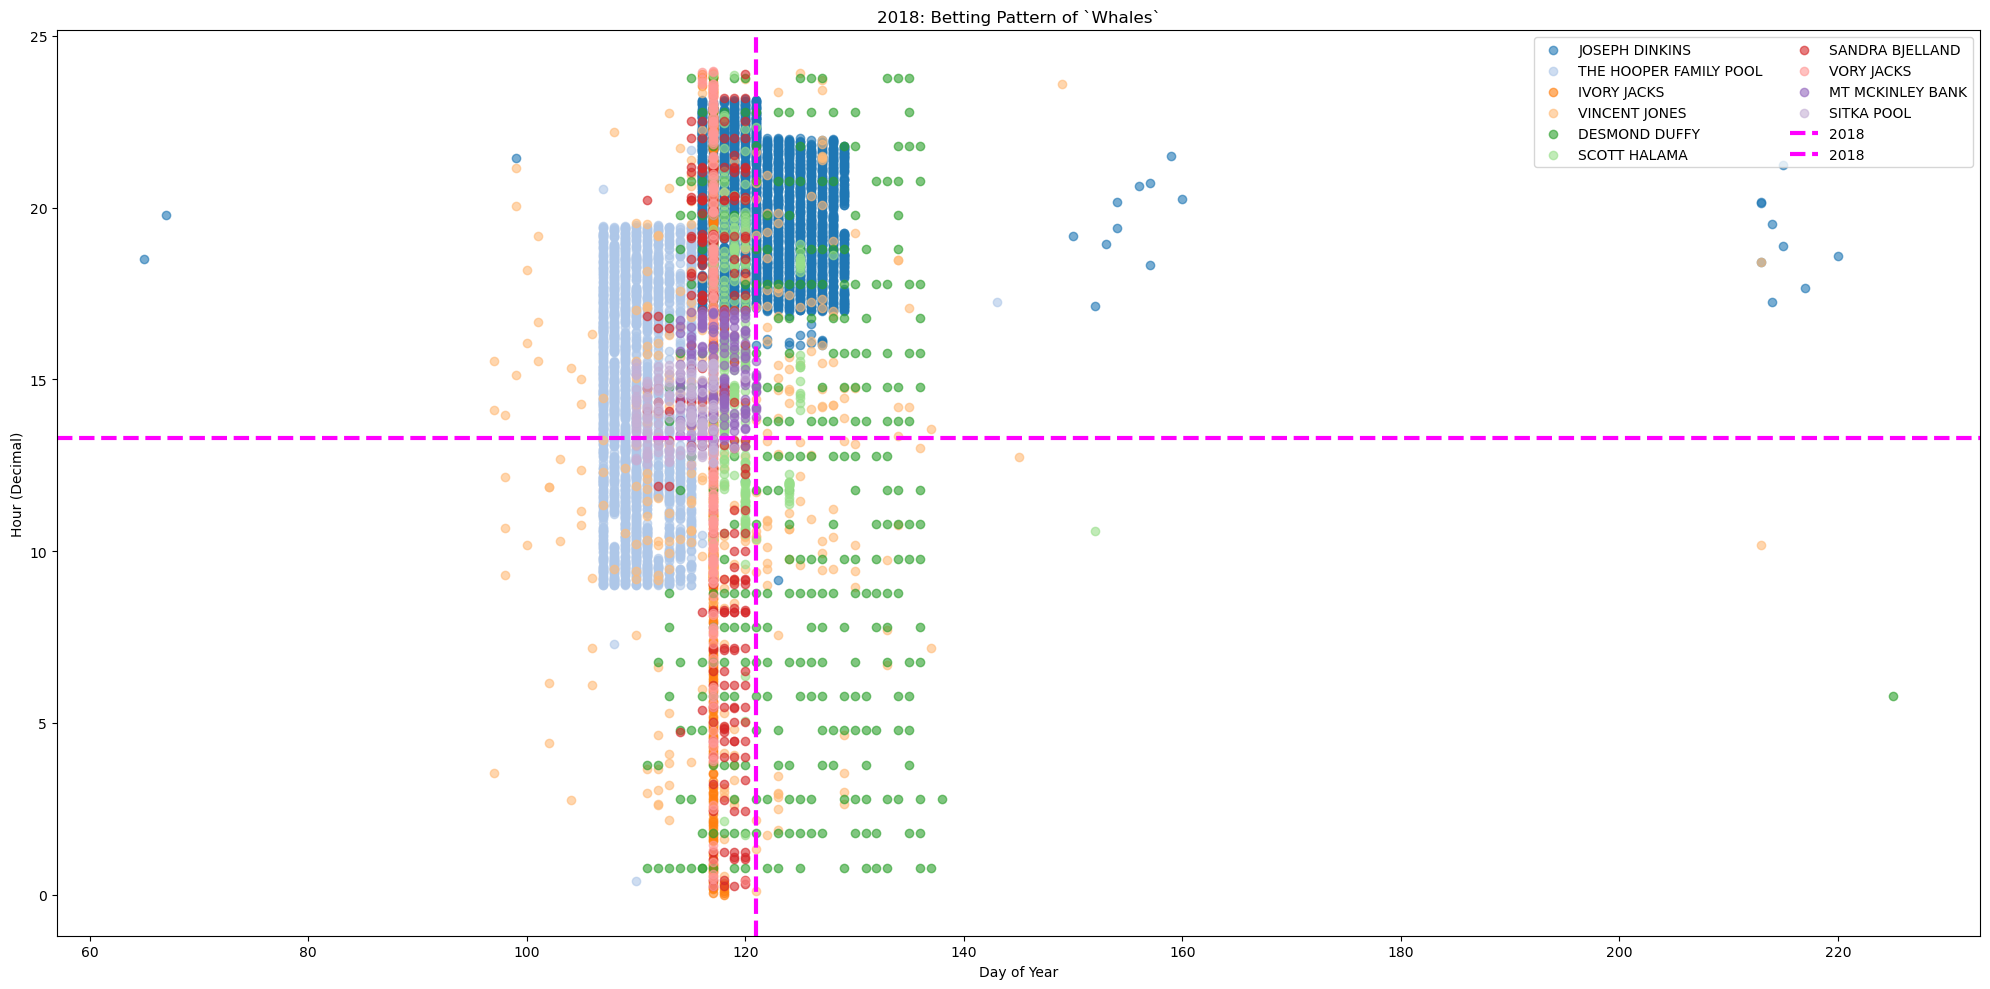

In [41]:
N=10
top_N = bets_2018_count[0:N].index
colors = plt.cm.tab20.colors

plt.figure(figsize=(20, 10))
plt.title('2018: Betting Pattern of `Whales`')

for i, name in enumerate(top_N):
    color = colors[i % len(colors)]  #e
    plt.scatter(
        bets_2018[bets_2018['Name'] == name]['DayOfYear'],
        bets_2018[bets_2018['Name'] == name]['Hour_decimal'],
        label=name,
        color=color,
        alpha=0.6
    )

plt.axvline(breakup_day_2018,label='2018',color='magenta',linestyle='--',linewidth=3)
plt.axhline(breakup_hour_decimal_2018,label='2018',color='magenta',linestyle='--',linewidth=3)
plt.xlabel('Day of Year')
plt.ylabel('Hour (Decimal)')
plt.legend(loc='upper right', ncol=2)
plt.tight_layout()
plt.show()